In [2]:
 #pip install --upgrade tensorflow-hub

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [16]:
IMAGE_SHAPE=(224,224)


classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE + (3,))
])




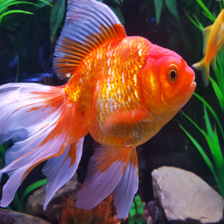

In [17]:
gold_fish= Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [18]:
gold_fish=np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [19]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [20]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [21]:
result

array([[ 0.1683909 ,  1.6209141 ,  9.028003  , ..., -1.1316186 ,
        -0.16427594,  0.24511161]], dtype=float32)

In [22]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [23]:
image_labels = []
with open('ImageNetLabels.txt','r') as f:
    image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [24]:
image_labels[predicted_label_index]

'goldfish'

# Load flowers dataset

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 93s 0us/step


In [4]:
data_dir


'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count= len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [9]:
roses=list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

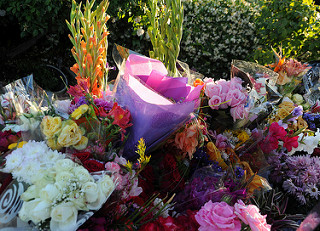

In [10]:
Image.open(str(roses[3]))

In [11]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [25]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [27]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img= cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        
        

In [28]:
X=np.array(X)
y=np.array(y)


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X ,y,random_state =0)

In [30]:
X_train_scaled=X_train/255.0
X_test_scaled= X_test/255.0

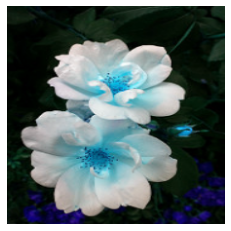

In [31]:
plt.axis('off')
plt.imshow(X[0])

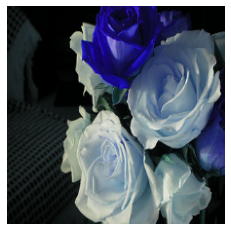

In [32]:
plt.axis('off')
plt.imshow(X[1])

In [36]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [38]:
image_labels[predicted[1]]

'umbrella'

In [41]:
feature_extractor_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer= hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False)



In [42]:
num_of_flowers=5
model=tf.keras.Sequential(
[
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 41s 385ms/step - loss: 0.8227 - acc: 0.6944
Epoch 2/5
86/86 [==============================] - 33s 385ms/step - loss: 0.4236 - acc: 0.8517
Epoch 3/5
86/86 [==============================] - 33s 379ms/step - loss: 0.3314 - acc: 0.8863
Epoch 4/5
86/86 [==============================] - 35s 409ms/step - loss: 0.2744 - acc: 0.9124
Epoch 5/5
86/86 [==============================] - 34s 394ms/step - loss: 0.2375 - acc: 0.9302


In [45]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 271ms/step - loss: 0.3847 - acc: 0.8529


[0.3847354054450989, 0.8529411554336548]

In [48]:
model.predict(np.array(X_test_scaled[0]))

ValueError: in user code:

    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow_hub\keras_layer.py:237 call  *
        result = smart_cond.smart_cond(training,
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\saved_model\load.py:664 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\eager\def_function.py:885 __call__
        result = self._call(*args, **kwds)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\eager\def_function.py:924 _call
        results = self._stateful_fn(*args, **kwds)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\eager\function.py:3038 __call__
        filtered_flat_args) = self._maybe_define_function(args, kwargs)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\eager\function.py:3463 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\eager\function.py:3298 _create_graph_function
        func_graph_module.func_graph_from_py_func(
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\framework\func_graph.py:1007 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\eager\def_function.py:668 wrapped_fn
        out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    D:\AnacondaEnviromentandInstallation\Anaconda3\envs\PytorchEnv\lib\site-packages\tensorflow\python\saved_model\function_deserialization.py:288 restored_function_body
        raise ValueError(

    ValueError: Could not find matching function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * Tensor("inputs:0", shape=(32, 224, 3), dtype=float32)
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
    Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


In [49]:
np.array(X_test_scaled[0])

array([[[0.00784314, 0.10980392, 0.04705882],
        [0.01176471, 0.12156863, 0.05882353],
        [0.01568627, 0.1372549 , 0.06666667],
        ...,
        [0.01568627, 0.03921569, 0.03529412],
        [0.01960784, 0.03921569, 0.03529412],
        [0.02352941, 0.03137255, 0.03137255]],

       [[0.        , 0.07843137, 0.02352941],
        [0.        , 0.09411765, 0.03529412],
        [0.        , 0.10980392, 0.04705882],
        ...,
        [0.01568627, 0.03529412, 0.03529412],
        [0.01960784, 0.03529412, 0.03137255],
        [0.01176471, 0.01960784, 0.01960784]],

       [[0.00392157, 0.0627451 , 0.01568627],
        [0.00392157, 0.0745098 , 0.02352941],
        [0.00392157, 0.08627451, 0.02745098],
        ...,
        [0.01568627, 0.03137255, 0.03137255],
        [0.01960784, 0.02745098, 0.02745098],
        [0.00784314, 0.01568627, 0.01568627]],

       ...,

       [[0.        , 0.12156863, 0.06666667],
        [0.00784314, 0.10196078, 0.05098039],
        [0.00392157, 0